In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install yfinance
import yfinance as yf

In [21]:
acoes = ['USDBRL=X','BTC-USD','ETH-USD','LTC-USD']
carteira = pd.DataFrame()

for i in acoes:
    carteira[i] = yf.download(i,period='max')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [36]:
#df = carteira
carteira = df.dropna()

In [37]:
carteira['BTC-USD'] = carteira['BTC-USD']*carteira['USDBRL=X']
carteira['ETH-USD'] = carteira['ETH-USD']*carteira['USDBRL=X']
carteira['LTC-USD'] = carteira['LTC-USD']*carteira['USDBRL=X']
carteira = carteira[['BTC-USD','ETH-USD','LTC-USD']]

<ipython-input-37-93ecd2c942fa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carteira['BTC-USD'] = carteira['BTC-USD']*carteira['USDBRL=X']
<ipython-input-37-93ecd2c942fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  carteira['ETH-USD'] = carteira['ETH-USD']*carteira['USDBRL=X']
<ipython-input-37-93ecd2c942fa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<AxesSubplot:xlabel='Date'>

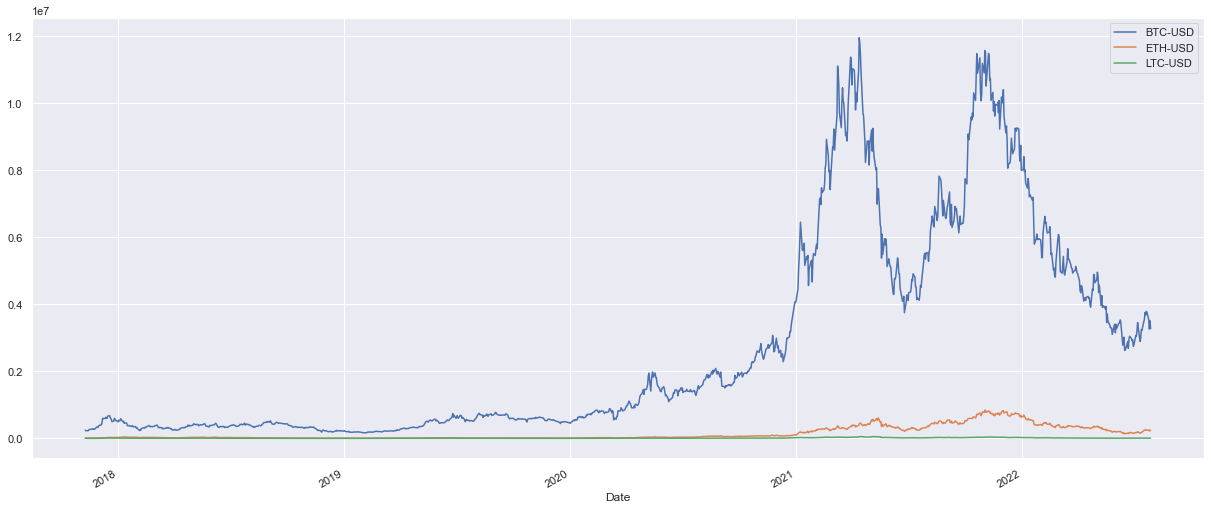

In [38]:
sns.set()
carteira.plot(figsize=(21,9))


In [39]:
retorno = carteira.pct_change()


In [40]:
retorno

,BTC-USD,ETH-USD,LTC-USD
Date,,,
2017-11-09,NaN,NaN,NaN
2017-11-10,-0.075775,-0.069646,-0.080157
2017-11-13,0.016708,0.085659,0.062780
2017-11-14,0.011163,0.065549,0.020431
2017-11-15,0.139190,0.020251,0.052192
...,...,...,...
2022-07-22,-0.004493,-0.010119,-0.018401
2022-07-25,-0.060141,-0.060419,-0.032798
2022-07-26,-0.079969,-0.076977,-0.084492


In [34]:
retorno_anual = retorno.mean() * 264

In [35]:
retorno_anual

BTC-USD    1.061874
ETH-USD    1.148092
LTC-USD    1.196605
dtype: float64

In [22]:
cov = retorno.cov() * 264
cov

,MGLU3.SA,PETR3.SA,VIIA3.SA
MGLU3.SA,0.524308,0.046641,0.289688
PETR3.SA,0.046641,0.144267,0.049745
VIIA3.SA,0.289688,0.049745,0.383388


In [23]:
corr = retorno.corr()
corr

,MGLU3.SA,PETR3.SA,VIIA3.SA
MGLU3.SA,1.000000,0.169585,0.646128
PETR3.SA,0.169585,1.000000,0.211517
VIIA3.SA,0.646128,0.211517,1.000000


In [25]:
num_acoes = len(acoes)
num_carteiras = 1000
peso = np.random.random(num_acoes)
peso /= np.sum(peso)

In [28]:
retorno_esperado = np.dot(peso,retorno_anual)

In [29]:
retorno_esperado

-1.8798739294752795

In [33]:
volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov,peso)))

In [34]:
volatilidade

0.59870968827767

In [35]:
sharpe = retorno_esperado/volatilidade

In [36]:
sharpe

-3.139875579570428

In [42]:

dic_carteira = {'retorno': np.array([retorno_esperado]), 'volatilidade':np.array([volatilidade]), 'sharpe':np.array([sharpe])}

In [43]:
portifolio = pd.DataFrame(dic_carteira)

In [44]:
portifolio

,retorno,volatilidade,sharpe
0,-1.879874,0.59871,-3.139876


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='volatilidade', ylabel='retorno'>

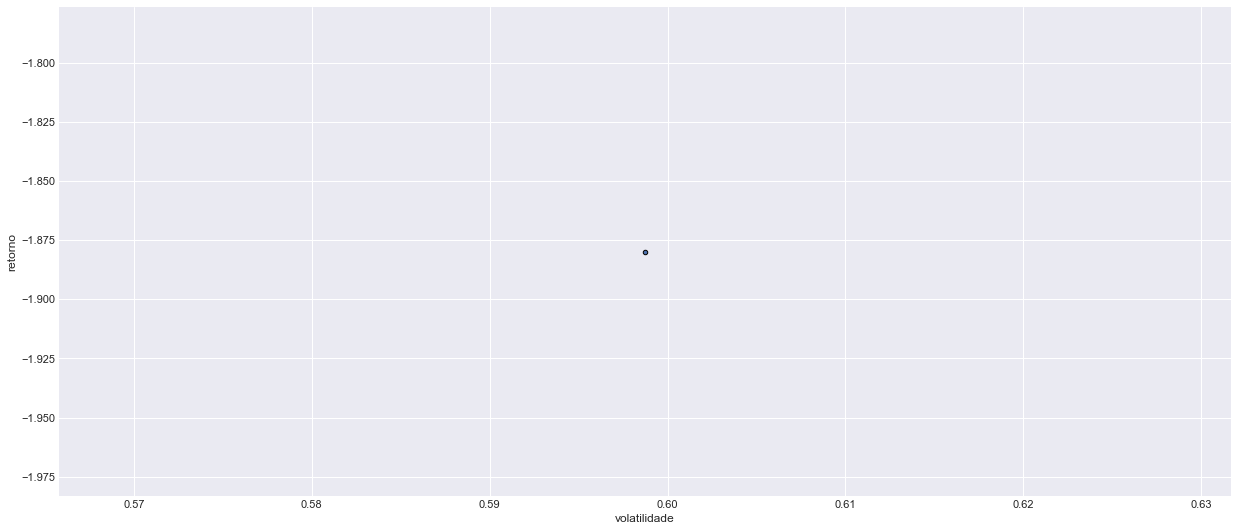

In [46]:
plt.style.use('seaborn-dark')
portifolio.plot.scatter(x='volatilidade',y='retorno', cmap='RdYlGn', edgecolors='black', figsize=(21,9), grid=True)

In [55]:
num_acoes = len(acoes)
num_carteiras = 100000

lista_retornos = []
lista_volatilidades = []
lista_pesos = []
lista_sharpe = []


In [56]:
for carteira in range(num_carteiras):
    peso = np.random.random(num_acoes)
    peso /= np.sum(peso)
    lista_pesos.append(peso)
    
    retorno_esperado = np.dot(peso,retorno_anual)
    lista_retornos.append(retorno_esperado)
    
    volatilidade = np.sqrt(np.dot(peso.T, np.dot(cov,peso)))
    lista_volatilidades.append(volatilidade)
    
    sharpe = retorno_esperado/volatilidade
    lista_sharpe.append(sharpe)
    

In [74]:
dic_carteiras = {'retorno': lista_retornos, 'volatilidade':lista_volatilidades, 'sharpe':lista_sharpe, 'pesos':lista_pesos}

In [75]:
portifolios = pd.DataFrame(dic_carteiras)

In [76]:
portifolios

,retorno,volatilidade,sharpe,pesos
0,-1.481396,0.505842,-2.928577,"[0.1996214596522309, 0.18729706368924648, 0.61..."
1,-0.852680,0.411050,-2.074394,"[0.3260581433301326, 0.45561499712913095, 0.21..."
2,-0.887611,0.411109,-2.159064,"[0.09346023216581979, 0.4273415478430568, 0.47..."
3,-1.529901,0.521825,-2.931825,"[0.4428172228890016, 0.1815849697720836, 0.375..."
4,-0.216628,0.358117,-0.604908,"[0.2186814451877133, 0.7131216766918325, 0.068..."
...,...,...,...,...
99995,-0.833252,0.406615,-2.049239,"[0.30524437739362736, 0.4624415354523682, 0.23..."
99996,-0.855800,0.403457,-2.121169,"[0.21487699305472321, 0.4477327060844552, 0.33..."
99997,-0.549982,0.373874,-1.471036,"[0.04793043357241744, 0.5647108190922137, 0.38..."
99998,-0.683418,0.384539,-1.777242,"[0.22525871445801174, 0.5198614540191225, 0.25..."


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='volatilidade', ylabel='retorno'>

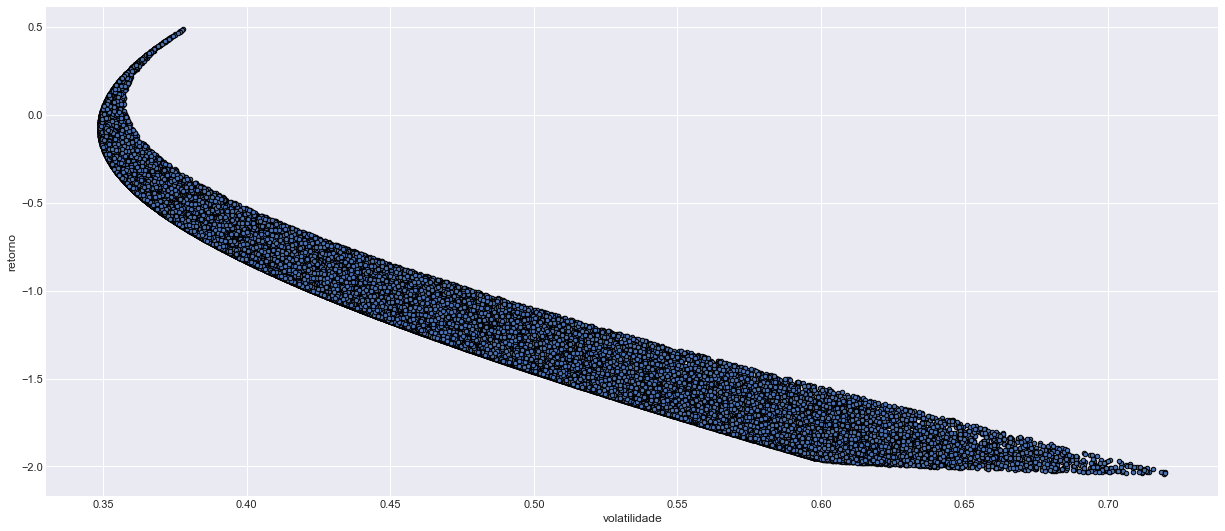

In [77]:
plt.style.use('seaborn-dark')
portifolios.plot.scatter(x='volatilidade',y='retorno', cmap='RdYlGn', edgecolors='black', figsize=(21,9), grid=True)

In [78]:
monor_volatilidade = portifolios['volatilidade'].min()
carteira_min_variancia = portifolios.loc[portifolios['volatilidade'] == monor_volatilidade]


In [79]:
carteira_min_variancia

,retorno,volatilidade,sharpe,pesos
86304,-0.074394,0.348817,-0.213275,"[0.07508403403992828, 0.7636197006920997, 0.16..."


In [80]:
maior_sharpe = portifolios['sharpe'].max()
carteira_maior_sharpe = portifolios.loc[portifolios['sharpe'] == maior_sharpe]

In [81]:
carteira_maior_sharpe

,retorno,volatilidade,sharpe,pesos
10893,0.487263,0.377963,1.289182,"[0.0073784937695466355, 0.9926141664461553, 7...."


In [73]:
maior_sharpe

1.2891815290949955

In [ ]:
============= Indices artigos===============


In [89]:
listaacoes = [("BTC-USD-Index", "BTC-USD"),
("S&P U.S. TREASURY BILL INDEX", "^SPBDUBIT"),
("S&P U.S. TREASURY BOND INDEX", "^SPBDUSBT"),
("DOW JONES EQUAL WEIGHTS U.S. ISSUED CORPORATE BONDS", "^DJCBP"),
("S&P WCI GOLD (ER)", "^SPWCGCP"),
("S&P 100", "^OEX"),
("S&P 500", "^GSPC"),
("S&P 600", "^SP600"),
("S&P WCI", "^SPWCI"),
("DOW JONES U.S. REAL EASTATE INDEX", "^DJUSRE"),
("Global hedge fund index", "HFUSAS.SW"),
("Dow Jones FXCM Dollar Index", "^USDOLLAR")]

In [90]:
carteira_teste = pd.DataFrame()
for i,a in listaacoes:
    carteira_teste[a] = yf.download(a, start="2012-02-01", end="2017-01-31")['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^SPBDUBIT: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^SPBDUSBT: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^DJCBP: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^SPWCGCP: No data found for this date range, symbol may be delisted
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

1 Failed download:

In [109]:
dd = yf.download('AMER3.SA',period='1y')

[*********************100%***********************]  1 of 1 completed


In [110]:
dd.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-29,69.169998,69.940002,67.849998,68.879997,67.523720,1240300
2021-06-30,68.599998,68.730003,66.139999,66.260002,64.955315,2760500
2021-07-01,66.930000,67.489998,65.260002,65.540001,64.249489,2326900
2021-07-02,66.029999,67.699997,65.989998,66.709999,65.396454,1157100
2021-07-05,66.589996,66.690002,65.419998,65.750000,64.455353,986900


In [93]:
carteira_teste

,BTC-USD,^SPBDUBIT,^SPBDUSBT,^DJCBP,^SPWCGCP,^OEX,^GSPC,^SP600,^SPWCI,^DJUSRE,HFUSAS.SW,^USDOLLAR
Date,,,,,,,,,,,,
2014-09-17,457.334015,NaN,NaN,NaN,NaN,891.669983,2001.569946,661.909973,NaN,NaN,98.220001,NaN
2014-09-18,424.440002,NaN,NaN,NaN,NaN,896.479980,2011.359985,665.650024,NaN,NaN,98.220001,NaN
2014-09-19,394.795990,NaN,NaN,NaN,NaN,897.090027,2010.400024,658.299988,NaN,NaN,98.220001,NaN
2014-09-20,408.903992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014-09-21,398.821014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-01-27,919.750000,NaN,NaN,NaN,NaN,1012.929993,2294.689941,838.359985,NaN,NaN,92.040001,NaN
2017-01-28,921.590027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-29,919.495972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
len(dd)

250

In [130]:

carteira_teste = yf.download('BTC-USD', start="2012-02-01", end="2022-01-31")['Adj Close']

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

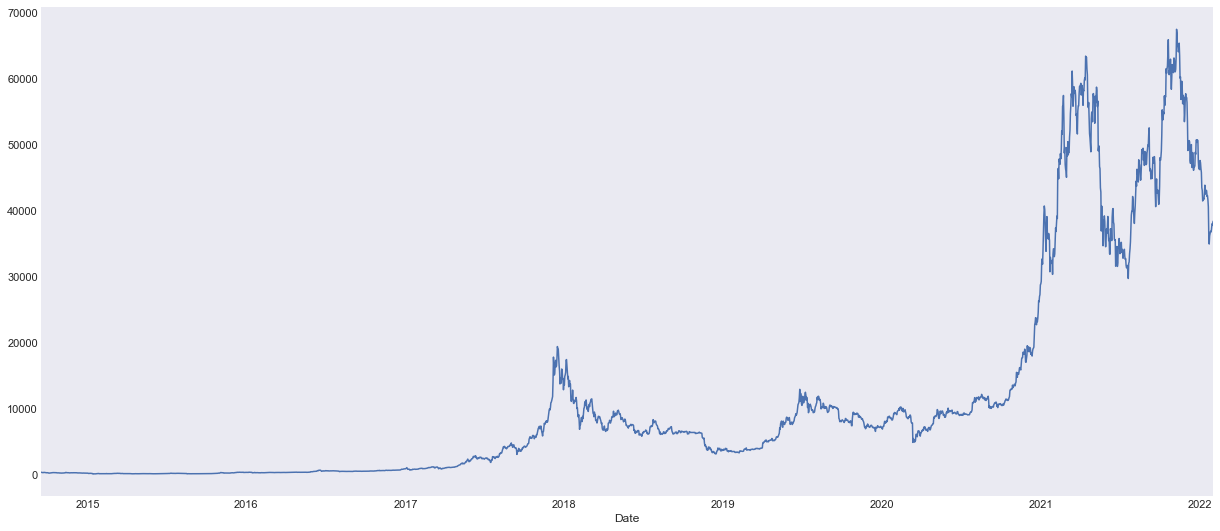

In [131]:
carteira_teste.plot(figsize=(21,9))

In [132]:
acoes = ['BTC-USD','LHC-USD','ETH-USD','BNB-USD']
carteira = pd.DataFrame()

for i in acoes:
    carteira[i] = yf.download(i,period='1y')['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

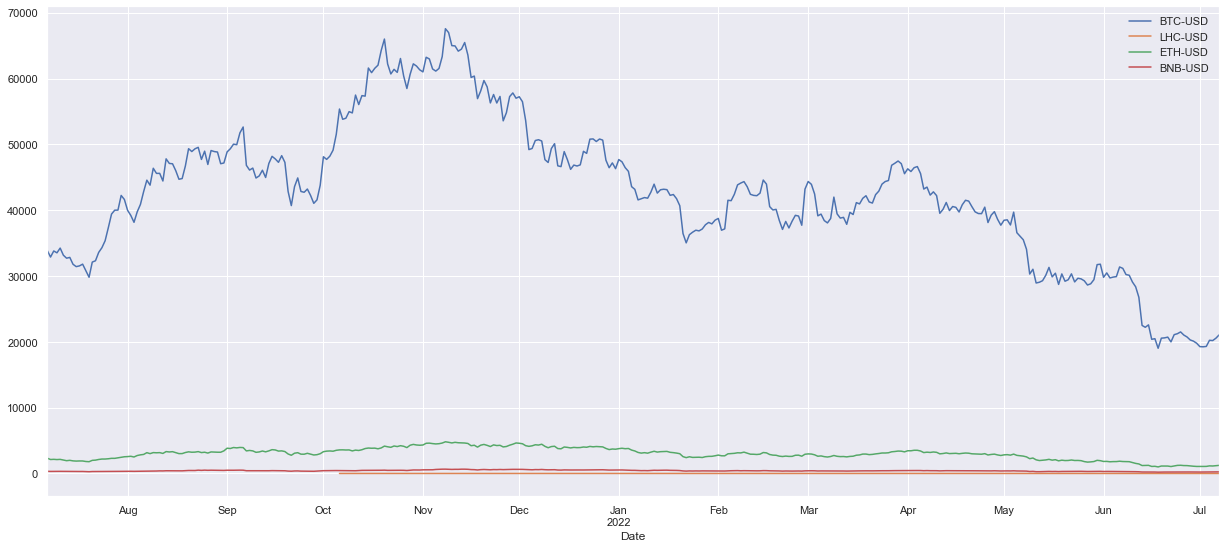

In [133]:
sns.set()
carteira.plot(figsize=(21,9))

In [134]:
carteira

,BTC-USD,LHC-USD,ETH-USD,BNB-USD
Date,,,,
2021-07-07,33855.328125,NaN,2315.161865,327.522461
2021-07-08,32877.371094,NaN,2120.026367,310.427124
2021-07-09,33798.011719,NaN,2146.692383,316.484528
2021-07-10,33520.519531,NaN,2111.403564,316.140137
2021-07-11,34240.187500,NaN,2139.664795,322.031647
...,...,...,...,...
2022-07-03,19297.076172,0.020244,1073.766968,218.980316
2022-07-04,20231.261719,0.020942,1151.059082,231.574127
2022-07-05,20190.115234,0.020392,1134.541016,230.846359


In [135]:
retorno = carteira.pct_change()
retorno_anual = retorno.mean() * 264
cov = retorno.cov() * 264
corr = retorno.corr()

In [157]:
retorno

,BTC-USD,LHC-USD,ETH-USD,BNB-USD
Date,,,,
2021-07-07,NaN,NaN,NaN,NaN
2021-07-08,-0.028886,NaN,-0.084286,-0.052196
2021-07-09,0.028002,NaN,0.012578,0.019513
2021-07-10,-0.008210,NaN,-0.016439,-0.001088
2021-07-11,0.021469,NaN,0.013385,0.018636
...,...,...,...,...
2022-07-03,0.002849,-0.381145,0.006802,0.004335
2022-07-04,0.048411,0.034479,0.071982,0.057511
2022-07-05,-0.002034,-0.026263,-0.014350,-0.003143


In [146]:
retorno_anual

BTC-USD   -0.176483
LHC-USD    2.896549
ETH-USD   -0.203311
BNB-USD    0.011066
dtype: float64

In [138]:
cov

,BTC-USD,LHC-USD,ETH-USD,BNB-USD
BTC-USD,0.332488,0.277370,0.358147,0.305360
LHC-USD,0.277370,13.863388,0.190090,0.255978
ETH-USD,0.358147,0.190090,0.506482,0.402510
BNB-USD,0.305360,0.255978,0.402510,0.453155


In [140]:
corr

,BTC-USD,LHC-USD,ETH-USD,BNB-USD
BTC-USD,1.000000,0.131074,0.872753,0.786685
LHC-USD,0.131074,1.000000,0.073716,0.104745
ETH-USD,0.872753,0.073716,1.000000,0.840179
BNB-USD,0.786685,0.104745,0.840179,1.000000


In [ ]:
=========================== TESTES ===== MAX ================

In [ ]:
=====================teste antes do teste====================

In [147]:
import pulp as p
import pandas as pd
import numpy as np
from collections import OrderedDict

prob = p.LpProblem('pesos_teste', p.LpMaximize)

In [149]:
p1 = p.LpVariable('p1',lowBound=0)
p2 = p.LpVariable('p2',lowBound=0)
p3 = p.LpVariable('p3',lowBound=0)
p4 = p.LpVariable('p4',lowBound=0)

i1 = -0.176483
i2 = 2.896549
i3 = -0.203311
i4 = 0.011066

In [150]:
prob += i1 * (p1*0.01) + i2 * (p2*0.01) + i3 * (p3*0.01) + i4 * (p4*0.01)
prob += p1 + p2 + p3 + p4 == 1

In [151]:
status = prob.solve()
print(p.LpStatus[status])


Optimal


In [152]:
print(p.value(prob.objective))

0.02896549


In [153]:
resultado = {
    'BTC-USD':[p.value(p1)],
    'LHC-USD':[p.value(p2)],
    'ETH-USD':[p.value(p3)],
    'BNB-USD':[p.value(p4)]
    
}

In [154]:
resultado

{'BTC-USD': [0.0], 'LHC-USD': [1.0], 'ETH-USD': [0.0], 'BNB-USD': [0.0]}

In [ ]:
def PesoIdeal(retorno_anual):
    
    return None

In [ ]:
#============================ Artigo encontrei em =============
#"https://nicobesser.medium.com/python-for-finance-portfolio-optimization-and-the-value-of-diversifying-99ef8e5cfbdc"

In [130]:
#!pip install PyPortfolioOpt
#!pip install pulp
#!pip install yfinance

import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from pandas_datareader import data
from pulp import *

In [289]:

#crpto 'BTC-USD','LHC-USD','ETH-USD','BNB-USD'

# assets = ['BTC-USD','ETH-USD',
# 'VALE3.SA',
# 'PETR3.SA',
# 'EMBR3.SA',
# 'AZUL4.SA',
# '^BVSP']

assets = [
     "^IBX50","^BVSP",
'BTC-USD','LHC-USD','ETH-USD','BNB-USD','USDBRL=X',
 "IBXX.SA",
 "^IEE",
 "GOVE.SA",
 "^IVBX",
 "ISE",
 "ITAG.SA",
 "INDX.SA",
 "SMLL.SA",
 "MLCX.SA"
         ]

#assets = ["AAPL", "MSFT","AMZN","GOOGL","FB","TSLA","V","^IXIC"]

In [291]:

initial_date = "2016-04-20"
today = "2018-12-31"
#today = datetime.today().strftime('%Y-%m-%d')

In [292]:
df_prices = pd.DataFrame()

In [293]:
# We give the function the empty dataframe, the name of the assets, the initial date and the end date:
def datosYahoo(dataframe,asset_list,start,finish):
    for i in asset_list:
        try:
            dataframe[i] = data.DataReader(i,data_source='yahoo',start= start , end=finish)["Adj Close"]
        except:
            print(i, 'Não foi possivel baixar')
            pass
    return dataframe


In [294]:
df = datosYahoo(df_prices,assets,initial_date,today)
df["^BVSP"] = df["^BVSP"]/1000
df

LHC-USD Não foi possivel baixar
IBXX.SA Não foi possivel baixar
^IEE Não foi possivel baixar
GOVE.SA Não foi possivel baixar
ISE Não foi possivel baixar
ITAG.SA Não foi possivel baixar
INDX.SA Não foi possivel baixar
SMLL.SA Não foi possivel baixar
MLCX.SA Não foi possivel baixar


,^IBX50,^BVSP,BTC-USD,ETH-USD,BNB-USD,USDBRL=X,^IVBX
Date,,,,,,,
2016-04-20,9040.519531,53.631,441.389008,NaN,NaN,3.5244,8044.009766
2016-04-22,8925.230469,52.908,445.737000,NaN,NaN,NaN,7977.779785
2016-04-25,8746.820312,51.862,461.425995,NaN,NaN,3.5504,7900.470215
2016-04-26,8947.559570,53.083,466.088989,NaN,NaN,3.5202,7993.549805
2016-04-27,9175.099609,54.478,444.687012,NaN,NaN,3.5215,8163.700195
...,...,...,...,...,...,...,...
2018-12-20,14179.669922,85.269,4134.441406,116.216873,5.792257,3.8962,10793.929688
2018-12-21,14259.089844,85.697,3896.543701,109.496231,5.567144,3.8389,10881.259766
2018-12-26,14159.740234,85.136,3857.297607,131.865631,5.713105,3.9028,10767.969727


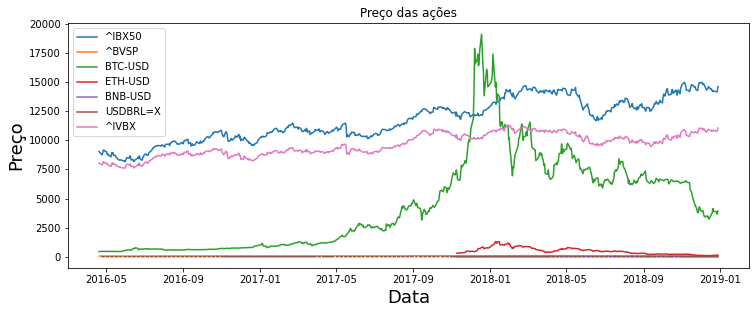

In [295]:
plt.figure(figsize=(12.2,4.5)) 
for i in df.columns.values:
    plt.plot( df[i],  label=i)
plt.title('Preço das ações')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Preço',fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [296]:
df = np.log(df).diff()
df = df.dropna()
#df.fillna(0, inplace=True)
df

,^IBX50,^BVSP,BTC-USD,ETH-USD,BNB-USD,USDBRL=X,^IVBX
Date,,,,,,,
2017-11-10,-0.010748,-0.010545,-0.076400,-0.069790,-0.102492,-0.000800,-0.022551
2017-11-13,0.004373,0.004273,-0.008901,0.056716,-0.063303,0.008490,0.005696
2017-11-14,-0.023069,-0.023001,0.011559,0.063948,-0.057371,-0.000153,-0.013808
2017-11-21,0.015735,0.015646,0.045922,0.080896,0.041310,-0.005088,0.015412
2017-11-22,-0.001335,-0.001019,0.022334,0.054668,0.023662,0.001014,-0.004890
...,...,...,...,...,...,...,...
2018-12-20,-0.005355,-0.004738,0.098677,0.137682,0.053248,-0.003766,-0.000583
2018-12-21,0.005585,0.005007,-0.059262,-0.059568,-0.039640,-0.014816,0.008058
2018-12-26,-0.006992,-0.006568,-0.010123,0.185893,0.025881,0.016508,-0.010466


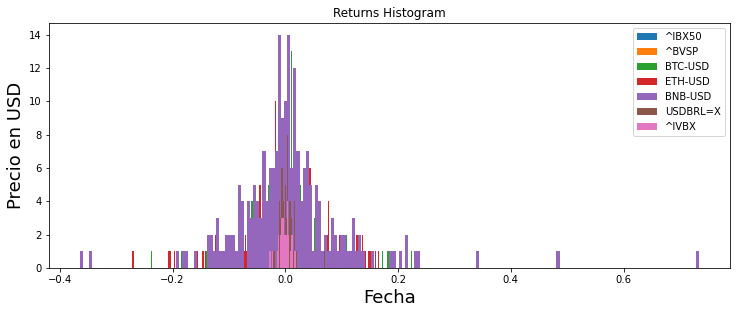

In [297]:
plt.figure(figsize=(12.2,4.5)) 
for i in df.columns.values:
    plt.hist( df[i],  label=i, bins = 200)
plt.title('Returns Histogram')
plt.xlabel('Fecha',fontsize=18)
plt.ylabel('Precio en USD',fontsize=18)
plt.legend(df.columns.values)
plt.show()

In [298]:
#df_assets =  df.loc[:, df.columns != '^IXIC']
df_assets =  df.loc[:, df.columns != '^BVSP']
df_assets

,^IBX50,BTC-USD,ETH-USD,BNB-USD,USDBRL=X,^IVBX
Date,,,,,,
2017-11-10,-0.010748,-0.076400,-0.069790,-0.102492,-0.000800,-0.022551
2017-11-13,0.004373,-0.008901,0.056716,-0.063303,0.008490,0.005696
2017-11-14,-0.023069,0.011559,0.063948,-0.057371,-0.000153,-0.013808
2017-11-21,0.015735,0.045922,0.080896,0.041310,-0.005088,0.015412
2017-11-22,-0.001335,0.022334,0.054668,0.023662,0.001014,-0.004890
...,...,...,...,...,...,...
2018-12-20,-0.005355,0.098677,0.137682,0.053248,-0.003766,-0.000583
2018-12-21,0.005585,-0.059262,-0.059568,-0.039640,-0.014816,0.008058
2018-12-26,-0.006992,-0.010123,0.185893,0.025881,0.016508,-0.010466


In [299]:
#df_benchmark1 =  df.loc[:, df.columns == '^IXIC']
df_benchmark1 =  df.loc[:, df.columns == '^BVSP']

In [288]:
import pypfopt as pt
retornos1 = pt.expected_returns.capm_return(df_assets, market_prices = df_benchmark1, returns_data= True, risk_free_rate=0.05/100, frequency=252)
retornos1

^IBX50      0.177526
BTC-USD     0.078478
ETH-USD     0.143703
BNB-USD     0.135556
USDBRL=X   -0.024655
Name: mkt, dtype: float64

In [189]:
df_cov = df_assets.cov()*252

In [190]:
df_cov

,BTC-USD,ETH-USD,VALE3.SA,PETR3.SA,EMBR3.SA,AZUL4.SA
BTC-USD,0.635277,0.553859,0.027065,0.020778,0.007994,0.001277
ETH-USD,0.553859,1.037818,0.068128,0.055456,0.020841,0.028476
VALE3.SA,0.027065,0.068128,0.108557,0.045381,0.033723,0.015908
PETR3.SA,0.020778,0.055456,0.045381,0.190448,0.056110,0.059252
EMBR3.SA,0.007994,0.020841,0.033723,0.056110,0.197377,0.024875
AZUL4.SA,0.001277,0.028476,0.015908,0.059252,0.024875,0.159484


In [191]:
# The function give us the equal weights for all assets:
def pesosPortafolio(dataframe):
    array = []
    for i in dataframe.columns:
        array.append(1/len(dataframe.columns))
    arrayFinal = np.array(array)
    return arrayFinal# Pesos are the resulting weights
pesos = pesosPortafolio(df_assets)
pesos

array([0.16666667, 0.16666667, 0.16666667, 0.16666667, 0.16666667,
       0.16666667])

In [192]:
#Portfolio Variance:
varianza_portafolio = pesos.T @ df_cov @pesos
"A variancia do portfolio é:" + " " + str(round(varianza_portafolio*100,1))+"%"#Result:'The variance of the portfolio is: 5.5%'

'A variancia do portfolio é: 12.1%'

In [193]:
# Portfolio Volatility
volatilidad_portafolio = np.sqrt(varianza_portafolio)
"A volatividade do portfolio é igual a:" + " " + str(round(volatilidad_portafolio*100,1))+"%"

'A volatividade do portfolio é igual a: 34.8%'

In [194]:
# Expected return of the portfolio
retorno_portafolio = np.sum(pesos*retornos1)
'O retorno esperado anual do portfolio é:' + ' ' + str(round(retorno_portafolio*100,3)) + '%'# Result: The expected annual return of the portfolio is: 18.723%'

'O retorno esperado anual do portfolio é: 12.843%'

In [195]:
ef = pt.EfficientFrontier(retornos1, df_cov, weight_bounds=(0,1))
weights = ef.min_volatility() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('BTC-USD', 0.0713), ('ETH-USD', 0.0), ('VALE3.SA', 0.40603), ('PETR3.SA', 0.06974), ('EMBR3.SA', 0.17412), ('AZUL4.SA', 0.27881)])
Expected annual return: 13.7%
Annual volatility: 24.4%
Sharpe Ratio: 0.48


(0.13665445955204586, 0.24388380235055987, 0.4783198327552976)

In [196]:
ef = pt.EfficientFrontier(retornos1, df_cov,weight_bounds=(-1,1))
weights = ef.max_sharpe() 
cleaned_weights = ef.clean_weights() 
print(cleaned_weights) 
ef.portfolio_performance(verbose=True)

OrderedDict([('BTC-USD', 0.00014), ('ETH-USD', -0.01433), ('VALE3.SA', 0.26493), ('PETR3.SA', 0.41076), ('EMBR3.SA', 0.04523), ('AZUL4.SA', 0.29328)])
Expected annual return: 18.3%
Annual volatility: 28.8%
Sharpe Ratio: 0.57


(0.1833600317171916, 0.2878012596425711, 0.5676140261514951)

In [197]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices
latest_prices = get_latest_prices(df_assets)
pesos = cleaned_weights 
da = DiscreteAllocation(pesos, latest_prices, total_portfolio_value=10.000)
allocation, leftover = da.lp_portfolio()
print("Quantidade de ações para comprar:", allocation)
print("Dinheiro Restante: ${:.2f}".format(leftover))

Quantidade de ações para comprar: {'VALE3.SA': 87, 'PETR3.SA': 105, 'EMBR3.SA': 15, 'AZUL4.SA': 94}
Money leftover: $0.17


/Users/001141585/opt/anaconda3/lib/python3.8/site-packages/cvxpy/problems/problem.py:1337: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


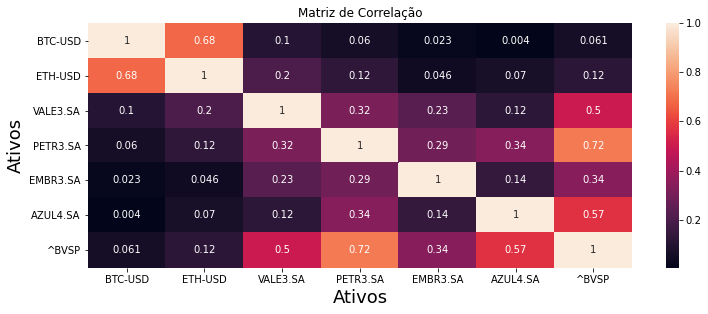

In [198]:
correlation_mat = df.corr()
plt.figure(figsize=(12.2,4.5))
sns.heatmap(correlation_mat, annot = True)
plt.title('Matriz de Correlação')
plt.xlabel('Ativos',fontsize=18)
plt.ylabel('Ativos',fontsize=18)
plt.show()

In [ ]:
========

In [213]:
#TT

import investpy

df = investpy.get_stock_historical_data(stock='MGLU3',
                                        country='brazil',
                                        from_date='01/01/2010',
                                        to_date='01/01/2020')
print(df.head())


ProxyError: HTTPSConnectionPool(host='www.investing.com', port=443): Max retries exceeded with url: /instruments/HistoricalDataAjax (Caused by ProxyError('Cannot connect to proxy.', OSError('Tunnel connection failed: 407 WebSocketBlock')))

In [214]:
 investpy.stocks.get_stock_countries()

['argentina',
 'brazil',
 'canada',
 'chile',
 'colombia',
 'costa rica',
 'jamaica',
 'mexico',
 'peru',
 'united states',
 'venezuela',
 'austria',
 'belgium',
 'bosnia',
 'bulgaria',
 'croatia',
 'cyprus',
 'czech republic',
 'denmark',
 'finland',
 'france',
 'germany',
 'greece',
 'hungary',
 'iceland',
 'ireland',
 'italy',
 'luxembourg',
 'malta',
 'montenegro',
 'netherlands',
 'norway',
 'poland',
 'portugal',
 'romania',
 'russia',
 'serbia',
 'slovakia',
 'slovenia',
 'spain',
 'sweden',
 'switzerland',
 'turkey',
 'ukraine',
 'united kingdom',
 'australia',
 'bangladesh',
 'china',
 'hong kong',
 'india',
 'indonesia',
 'japan',
 'kazakhstan',
 'malaysia',
 'mongolia',
 'new zealand',
 'pakistan',
 'philippines',
 'singapore',
 'south korea',
 'sri lanka',
 'taiwan',
 'thailand',
 'vietnam',
 'bahrain',
 'egypt',
 'iraq',
 'israel',
 'jordan',
 'kuwait',
 'lebanon',
 'oman',
 'palestine',
 'qatar',
 'saudi arabia',
 'dubai',
 'botswana',
 'ivory coast',
 'kenya',
 'malawi',

In [242]:
data.DataReader('USDBRL=X',data_source='yahoo',start= initial_date , end=today)["Adj Close"]

Date
2016-04-19    3.5253
2016-04-20    3.5244
2016-04-21    3.5244
2016-04-24    3.5623
2016-04-25    3.5504
               ...  
2022-07-04    5.3283
2022-07-05    5.3852
2022-07-06    5.4280
2022-07-07    5.3382
2022-07-11    5.3782
Name: Adj Close, Length: 1621, dtype: float64

In [254]:
https://economia.awesomeapi.com.br/json/daily/USD-BRL/?start_date=20180901&end_date=20180930

SyntaxError: invalid syntax (<ipython-input-254-7442e38a1492>, line 1)